# Calculation

In [1]:
# https://product.tdk.com/system/files/dam/doc/product/ferrite/ferrite/ferrite-core/data_sheet/80/db/fer/elp_43_10_28.pdf?ref_disty=mouser
# Combination: ELP 43/10/28 with ELP 43/10/28 N87
# Ae = 225 mm2
Ae = 225e-6
# le = 61.6 mm
le = 61.6e-3
AL = 7300e-9 #nH +/-25%
N = 8
L = AL *N**2
print(L*1e6,'uH')
#v = L di/dt 
#dt = L di/v
v=97
di=1

dt= L*di/v
print(dt*1e6,"us")
print("B mT", 1e3*v*dt/(Ae*N))

467.20000000000005 uH
4.816494845360825 us
B mT 259.5555555555556


In [2]:
import numpy as np

# Core parameters (m, H/m)
AL_nom = AL
mu0 = 4 * np.pi * 1e-7
gapp = 0.4e-3  
lg=2*gapp # Total gap 2 * x

# Calculate new AL using the reluctance sum formula:
# 1/AL_gapped = 1/AL_nom + lg / (mu0 * Ae)
AL_gapped = 1 / ((1 / AL_nom) + (lg / (mu0 * Ae)))
L_air_gap = N**2*AL_gapped
print(f"AL (nH) with 0.10 mm gap: {AL_gapped * 1e9:.0f}")
print(f"L (uH) with 0.10 mm gap: {L_air_gap * 1e6:.0f}")



v=97
di=11

dt= L_air_gap*di/v
print(dt*1e6,"us")
print("B mT", 1e3*v*dt/(Ae*N))

AL (nH) with 0.10 mm gap: 337
L (uH) with 0.10 mm gap: 22
2.4466402305368855 us
B mT 131.84672353448772


# Test 1 pulse 2us

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("2025-11-30_15-16-23-989.csv")
vds = df.CH1.values*100  # x100 probe
iD =  df.CH2.values # x100 probe
Ts = df.Ts.values[0]
df.head()

,CH1,CH2,time,Ts
0,0.212156,-0.280313,0.000000e+00,1.000000e-09
1,0.215969,-0.520000,1.000000e-09,NaN
2,0.215938,-0.435312,2.000000e-09,NaN
3,0.212000,-0.359063,3.000000e-09,NaN
4,0.216031,-0.402500,4.000000e-09,NaN


In [6]:
def trigger (sig , thresh= None, transition= "rise", marginI = 20):
    arr=[0]
    if thresh is None: 
        thresh = (sig.max()+sig.min())/2
    for i in range(1, len(sig)):
        if transition =="rise":
            if sig[i-1] <thresh and sig[i] >= thresh and i > arr[-1]+marginI:
                arr.append(i)
        elif sig[i-1] >thresh and sig[i] <= thresh and i > arr[-1]+marginI:
            arr.append(i)
    return arr[1:]


In [7]:
v0=vds[:200].mean()
i0= iD[:200].mean()
print(v0, i0)
vds2= vds-v0
id2=iD-i0

21.18740625 -0.42473749999999993


In [8]:
idx_rise = trigger (vds, transition= "rise")
idx_fall= trigger (vds, transition= "fall")
len(idx_rise), len(idx_fall)

(1, 1)

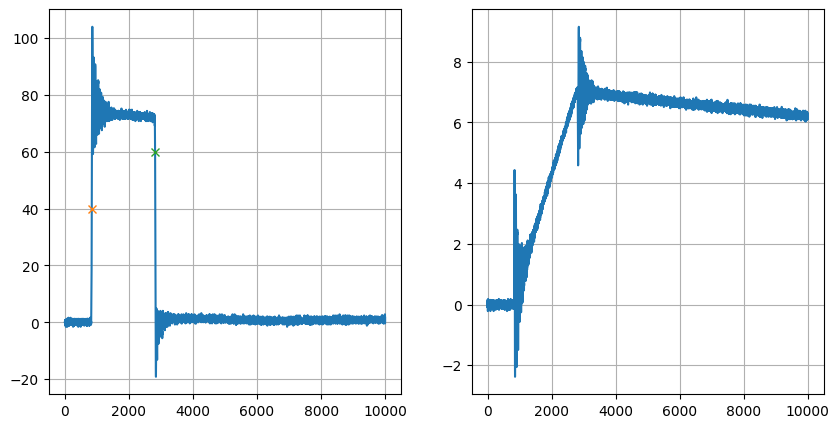

In [9]:
fig, axs = plt.subplots(1,2, figsize= (10,5))
axs[0].plot(vds2)
if len(idx_rise): 
    axs[0].plot(idx_rise, len(idx_rise)*[40], marker= "x")
if len(idx_fall): 
    axs[0].plot(idx_fall, len(idx_fall)*[60], marker= "x")
axs[1].plot(id2)
axs[0].grid()
axs[1].grid()

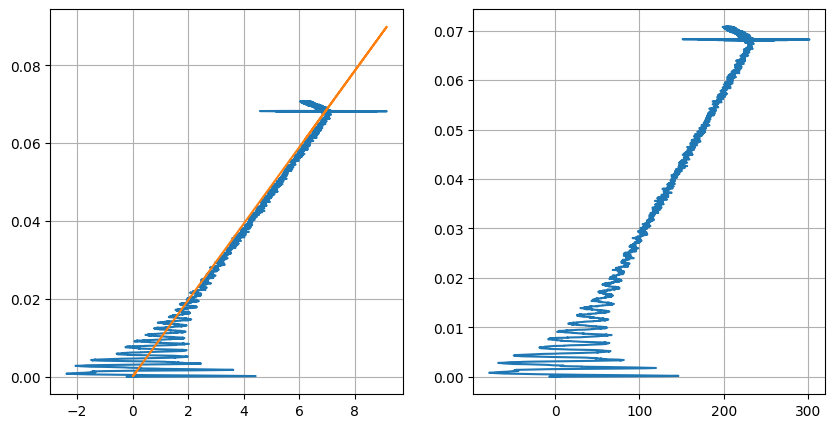

In [14]:
# https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_102_20_38.pdf
# ELP 102/20/38 with I 102/7/38
# Ae = 534.2 mm2
Ae = 534.2e-6
# le = 121.2 mm
le = 121.2e-3
integV= np.cumsum(vds2)*Ts
N= 4
flux = integV/N
B = flux /Ae
H= N*id2/le
fig, axs = plt.subplots(1,2, figsize= (10,5))
plt.plot

L = 21e-6
Bcal = L*id2/(Ae*N)
AL = L/N**2 # L= AL *N**2 

#ALnom = 9600
#error =100*(AL*1e9-ALnom) /ALnom
#print ("AL (nH)= ", AL*1e9, "error %", error)

axs[0].plot(id2,B)
msk = (Bcal < 0.1)  & (id2 >0)
axs[0].plot(id2[msk],Bcal[msk])
axs[1].plot(H, B)
axs[0].grid()
axs[1].grid()

# Test 2 pulse 3us

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv("2025-11-30_15-19-35-805.csv")
vds = df.CH1.values*100  # x100 probe
iD =  df.CH2.values # x100 probe
Ts = df.Ts.values[0]
df.head()

,CH1,CH2,time,Ts
0,-0.135937,-0.480000,0.000000e+00,1.000000e-09
1,-0.136031,-0.440000,1.000000e-09,NaN
2,-0.135937,-0.561250,2.000000e-09,NaN
3,-0.132031,-0.560000,3.000000e-09,NaN
4,-0.140063,-0.519687,4.000000e-09,NaN


In [17]:
def trigger (sig , thresh= None, transition= "rise", marginI = 20):
    arr=[0]
    if thresh is None: 
        thresh = (sig.max()+sig.min())/2
    for i in range(1, len(sig)):
        if transition =="rise":
            if sig[i-1] <thresh and sig[i] >= thresh and i > arr[-1]+marginI:
                arr.append(i)
        elif sig[i-1] >thresh and sig[i] <= thresh and i > arr[-1]+marginI:
            arr.append(i)
    return arr[1:]


In [18]:
v0=vds[:200].mean()
i0= iD[:200].mean()
print(v0, i0)
vds2= vds-v0
id2=iD-i0

-13.62871875 -0.4707953125


In [19]:
idx_rise = trigger (vds, transition= "rise")
idx_fall= trigger (vds, transition= "fall")
len(idx_rise), len(idx_fall)

(1, 1)

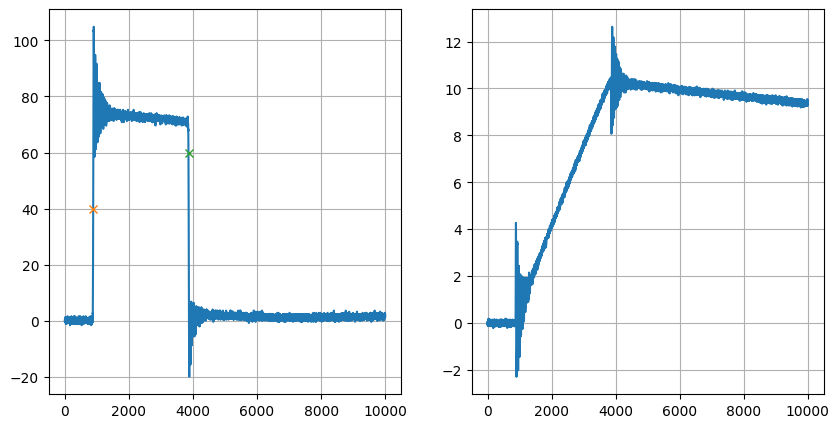

In [20]:
fig, axs = plt.subplots(1,2, figsize= (10,5))
axs[0].plot(vds2)
if len(idx_rise): 
    axs[0].plot(idx_rise, len(idx_rise)*[40], marker= "x")
if len(idx_fall): 
    axs[0].plot(idx_fall, len(idx_fall)*[60], marker= "x")
axs[1].plot(id2)
axs[0].grid()
axs[1].grid()

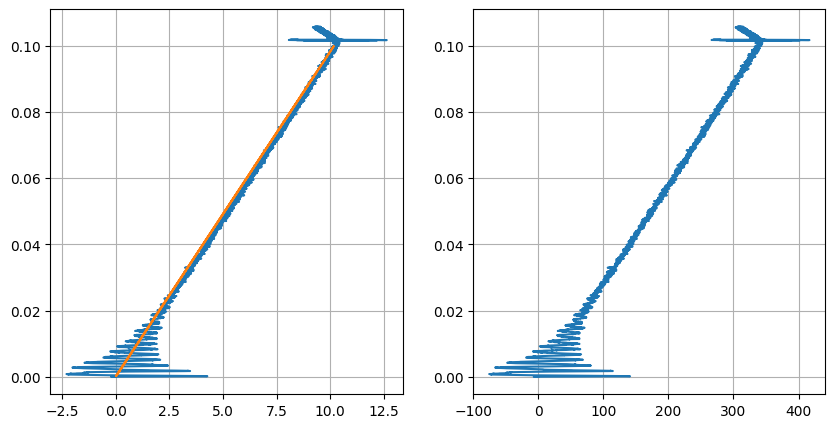

In [21]:
# https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_102_20_38.pdf
# ELP 102/20/38 with I 102/7/38
# Ae = 534.2 mm2
Ae = 534.2e-6
# le = 121.2 mm
le = 121.2e-3
integV= np.cumsum(vds2)*Ts
N= 4
flux = integV/N
B = flux /Ae
H= N*id2/le
fig, axs = plt.subplots(1,2, figsize= (10,5))
plt.plot

L = 21e-6
Bcal = L*id2/(Ae*N)
AL = L/N**2 # L= AL *N**2 

#ALnom = 9600
#error =100*(AL*1e9-ALnom) /ALnom
#print ("AL (nH)= ", AL*1e9, "error %", error)

axs[0].plot(id2,B)
msk = (Bcal < 0.1)  & (id2 >0)
axs[0].plot(id2[msk],Bcal[msk])
axs[1].plot(H, B)
axs[0].grid()
axs[1].grid()

# Test 3 pulse 10us

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df = pd.read_csv("2025-11-30_15-22-38-651.csv")
vds = df.CH1.values*100  # x100 probe
iD =  df.CH2.values # x100 probe
Ts = df.Ts.values[0]
df.head()

,CH1,CH2,time,Ts
0,-0.084031,-0.809375,0.000000e+00,2.000000e-09
1,-0.084000,-0.400781,2.000000e-09,NaN
2,-0.079937,-0.600000,4.000000e-09,NaN
3,-0.076031,-0.600000,6.000000e-09,NaN
4,-0.083969,-0.700781,8.000000e-09,NaN


In [24]:
def trigger (sig , thresh= None, transition= "rise", marginI = 20):
    arr=[0]
    if thresh is None: 
        thresh = (sig.max()+sig.min())/2
    for i in range(1, len(sig)):
        if transition =="rise":
            if sig[i-1] <thresh and sig[i] >= thresh and i > arr[-1]+marginI:
                arr.append(i)
        elif sig[i-1] >thresh and sig[i] <= thresh and i > arr[-1]+marginI:
            arr.append(i)
    return arr[1:]


In [25]:
v0=vds[:200].mean()
i0= iD[:200].mean()
print(v0, i0)
vds2= vds-v0
id2=iD-i0

-8.18890625 -0.61077734375


In [26]:
idx_rise = trigger (vds, transition= "rise")
idx_fall= trigger (vds, transition= "fall")
len(idx_rise), len(idx_fall)

(1, 1)

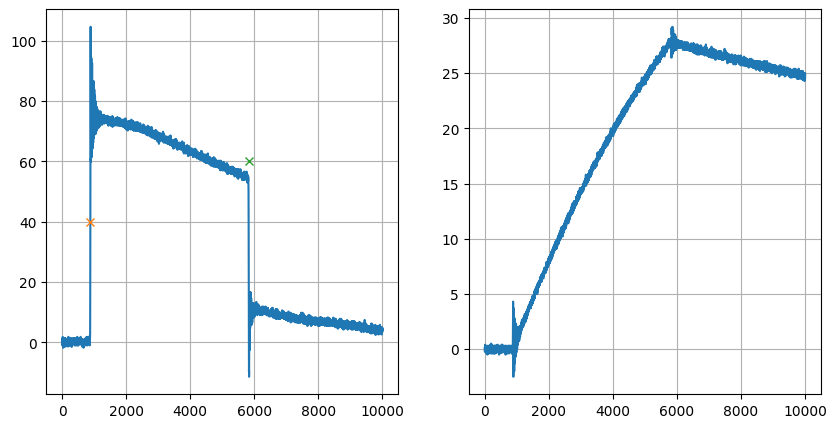

In [27]:
fig, axs = plt.subplots(1,2, figsize= (10,5))
axs[0].plot(vds2)
if len(idx_rise): 
    axs[0].plot(idx_rise, len(idx_rise)*[40], marker= "x")
if len(idx_fall): 
    axs[0].plot(idx_fall, len(idx_fall)*[60], marker= "x")
axs[1].plot(id2)
axs[0].grid()
axs[1].grid()

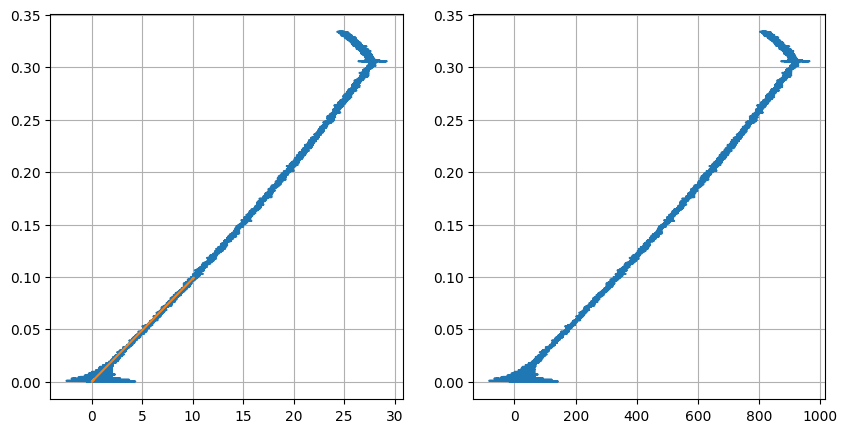

In [29]:
# https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_102_20_38.pdf
# ELP 102/20/38 with I 102/7/38
# Ae = 534.2 mm2
Ae = 534.2e-6
# le = 121.2 mm
le = 121.2e-3
integV= np.cumsum(vds2)*Ts
N= 4
flux = integV/N
B = flux /Ae
H= N*id2/le
fig, axs = plt.subplots(1,2, figsize= (10,5))
plt.plot

L = 21e-6
Bcal = L*id2/(Ae*N)
AL = L/N**2 # L= AL *N**2 

#ALnom = 9600
#error =100*(AL*1e9-ALnom) /ALnom
#print ("AL (nH)= ", AL*1e9, "error %", error)

axs[0].plot(id2,B)
msk = (Bcal < 0.1)  & (id2 >0)
axs[0].plot(id2[msk],Bcal[msk])
axs[1].plot(H, B)
axs[0].grid()
axs[1].grid()